# sklearn review

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(44)
#10*равномерное распределение
x = 10 * rng.rand(50)
y = 2 * x - 1
plt.scatter(x, y);

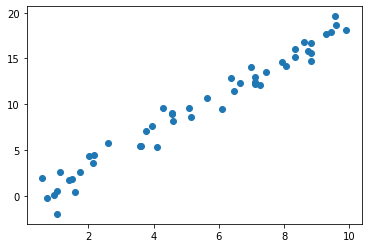

In [5]:
#... + нормальное распределение
y = 2 * x - 1 + rng.randn(50) 
plt.scatter(x, y);

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
X = x[:,np.newaxis]
X

array([[8.34842149],
       [1.04796104],
       [7.44640482],
       [3.60500836],
       [3.59310838],
       [6.09238381],
       [3.93779551],
       [4.0907261 ],
       [5.0990241 ],
       [7.10147993],
       [9.60526225],
       [4.56621109],
       [4.27651521],
       [1.13463701],
       [2.17898869],
       [9.57472069],
       [9.4335072 ],
       [8.81824281],
       [6.46410562],
       [2.13824812],
       [6.36832014],
       [1.39146252],
       [4.5870407 ],
       [8.73863185],
       [2.58450306],
       [6.64851098],
       [8.62674336],
       [1.48848063],
       [5.62949958],
       [1.59155264],
       [1.72894927],
       [1.04022961],
       [2.02937593],
       [4.55189297],
       [7.94574916],
       [9.90822681],
       [8.05017201],
       [3.77415406],
       [5.15737426],
       [0.58898921],
       [7.11095686],
       [0.72507813],
       [8.82611582],
       [7.26057819],
       [8.33366212],
       [7.10230684],
       [6.97429918],
       [9.301

In [9]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.coef_

array([1.97174601])

In [11]:
model.intercept_

-0.9470694751774005

Predict labels for unknown data

In [12]:
xfit = [10*np.random.ranf() for i in range(50)]
xfit = np.array(xfit)
Xpred = xfit[:, np.newaxis]
Xpred.shape

(50, 1)

In [13]:
# xfit = np.linspace(-1, 11) #равномерно распределяет числа в указанном диапазоне (по умолчанию 50 чисел)
# xfit

In [14]:
ypred = model.predict(Xpred)
ypred

array([ 3.12648702,  3.31506825,  3.58527998, 15.13252146, 18.32532707,
        5.72726045,  7.9419827 ,  0.18035214,  8.4327274 , 16.30472091,
        0.3821917 , 17.66495394,  5.98022432, 18.06622797,  2.00930586,
       15.22733521, 18.67796162,  8.5093433 , 15.7216788 , 12.87779402,
        5.4559767 , 13.1954632 ,  9.28981021, 15.98323512,  2.43692891,
        6.18402408,  4.38183078, 10.79854145, 15.28871972, 12.39638862,
        9.24474768,  2.0907583 ,  9.97678124, 12.19811018,  5.79939554,
       14.05454265,  0.34812453, 16.270798  , 15.7508988 ,  2.61423925,
        1.53781303, 12.39767403,  9.57904232, 15.36374858, 16.70273943,
       10.04532398,  5.64179959, 13.13659248, 16.41497185, 10.68868246])

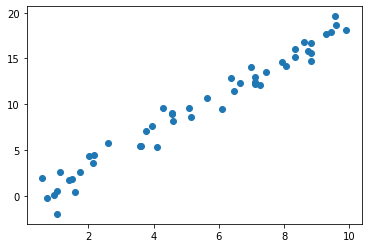

In [15]:
plt.scatter(X,y)

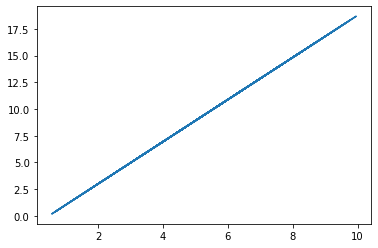

In [16]:
plt.plot(Xpred,ypred)

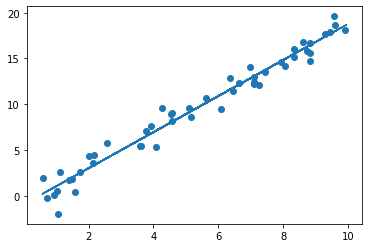

In [17]:
plt.scatter(x, y)
plt.plot(Xpred, ypred);

<b>PCA</b>

In [18]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


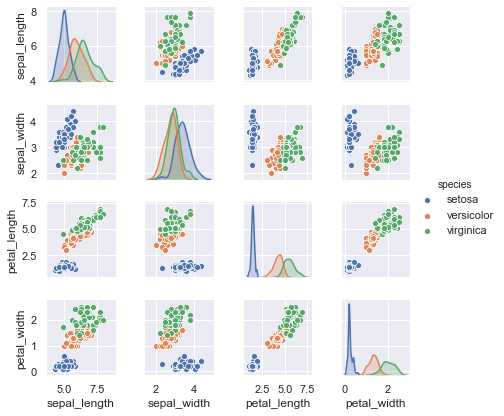

In [19]:
%matplotlib inline
import seaborn as sns; 
sns.set()
sns.pairplot(iris, hue='species', height=1.5);

In [20]:
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

In [21]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

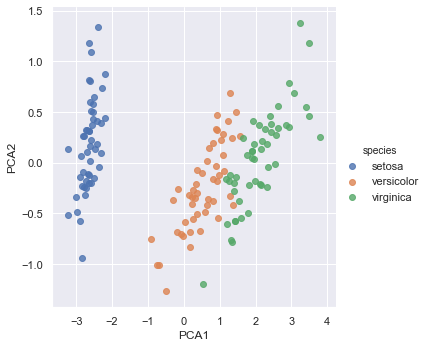

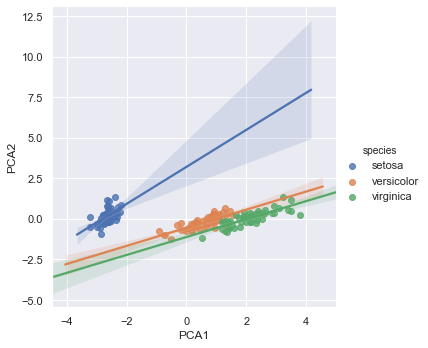

In [22]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=True);

We see that in the two-dimensional representation, the species are fairly <b>well separated</b>, even though the PCA algorithm had no knowledge of the species labels! This indicates to us that a relatively <b>straightforward classification</b> will probably be <b>effective</b> on the dataset, as we saw before.

<b>Gaussian Mixture</b>

In [23]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

In [24]:
y_gmm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [25]:
iris['cluster_n'] = y_gmm

True labels:

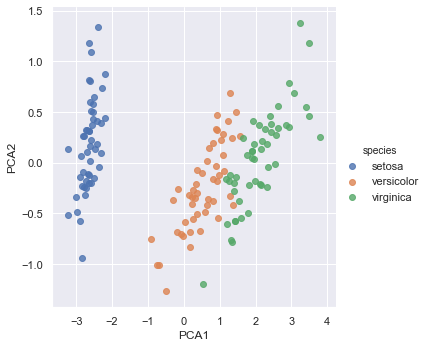

In [26]:
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

Cluster-defined labels:

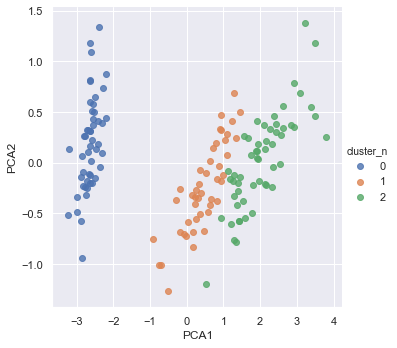

In [27]:
sns.lmplot("PCA1", "PCA2", hue='cluster_n', data=iris, fit_reg=False);

Cluster-defined labels put on different columns:

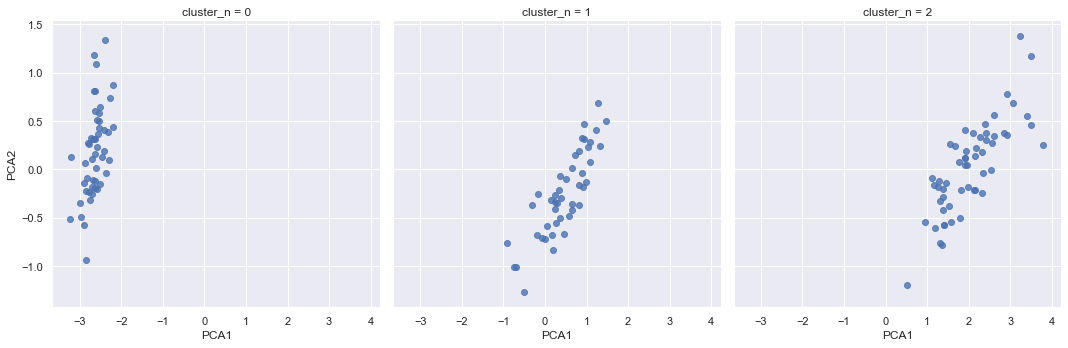

In [28]:
sns.lmplot("PCA1", "PCA2", col='cluster_n', data=iris, fit_reg=False);

In [29]:
iris['species']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
10        setosa
11        setosa
12        setosa
13        setosa
14        setosa
15        setosa
16        setosa
17        setosa
18        setosa
19        setosa
20        setosa
21        setosa
22        setosa
23        setosa
24        setosa
25        setosa
26        setosa
27        setosa
28        setosa
29        setosa
         ...    
120    virginica
121    virginica
122    virginica
123    virginica
124    virginica
125    virginica
126    virginica
127    virginica
128    virginica
129    virginica
130    virginica
131    virginica
132    virginica
133    virginica
134    virginica
135    virginica
136    virginica
137    virginica
138    virginica
139    virginica
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virgini

**ISOMAP dimension reduction**

In [30]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [31]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [32]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [33]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [34]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

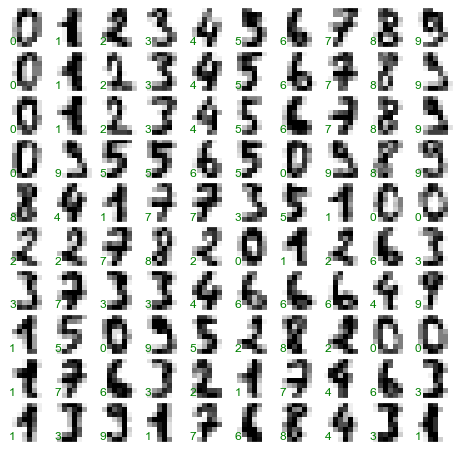

In [35]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [36]:
X = digits.data
X.shape

(1797, 64)

In [37]:
y = digits.target
y.shape

(1797,)

In [38]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

In [39]:
data_projected

array([[ 167.27247954,   22.18515653],
       [ -48.71476497,   51.30840484],
       [-100.719723  ,   25.82132196],
       ...,
       [ -51.43618206,  -23.29369929],
       [  -0.22056414,  -73.32775967],
       [ -11.36581193,  -36.23661186]])

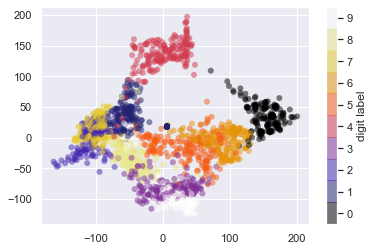

In [40]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [45]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

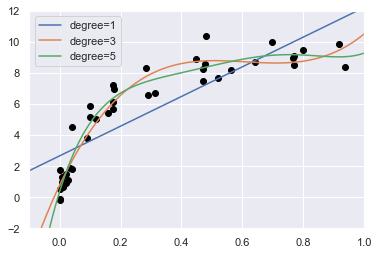

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

**Validation score across the range of polymon degree**

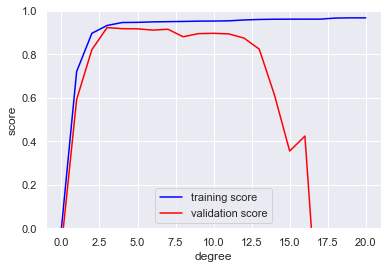

In [48]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

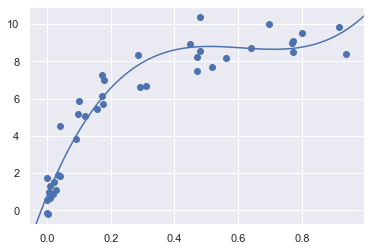

In [49]:
#let degree be 3
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

**PCA**

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

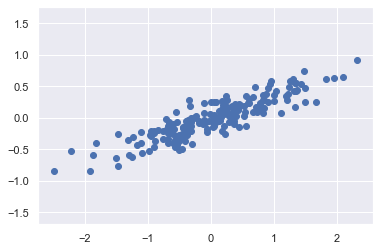

In [69]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [71]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [72]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


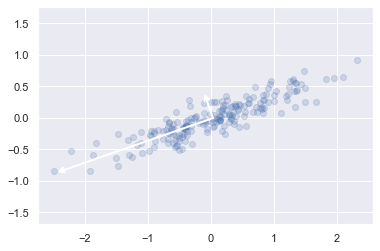

In [73]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


**DIM reduction**

In [81]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)


original shape:    (200, 2)
transformed shape: (200, 1)


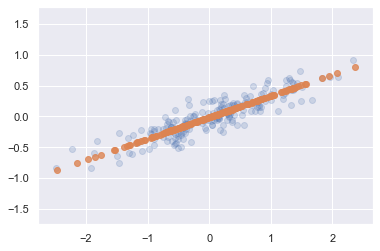

In [82]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

**Choosing the number of components**

In [83]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [84]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


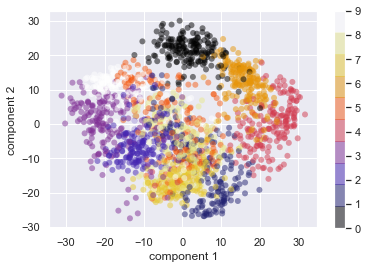

In [86]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

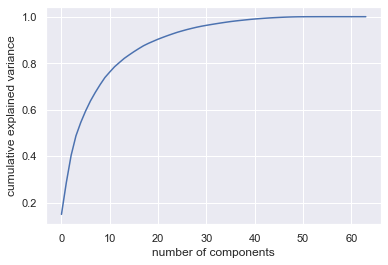

In [87]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**PCA as Noise Filtering**

In [90]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


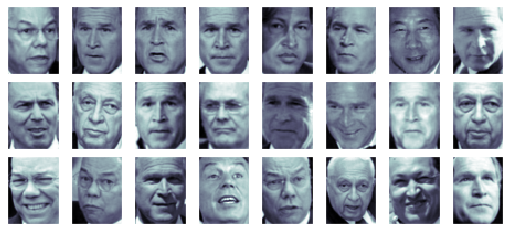

In [101]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.data[i].reshape(62, 47), cmap='bone')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


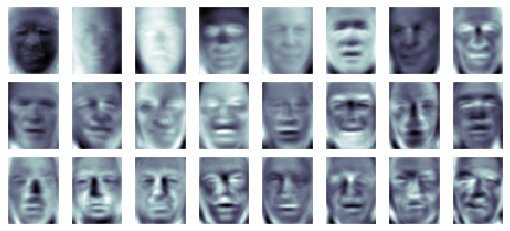

In [109]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

**k-Means Algorithm: Expectation–Maximization**

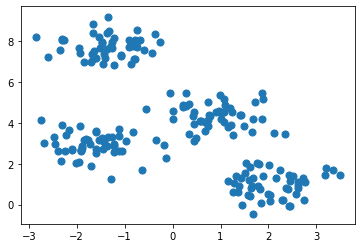

In [25]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [26]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([2, 3, 0, 1, 2, 0, 3, 0, 0, 0, 0, 2, 3, 3, 2, 0, 1, 1, 1, 2, 1, 3,
       2, 3, 2, 2, 1, 2, 2, 0, 1, 0, 3, 2, 3, 0, 3, 0, 0, 1, 1, 1, 1, 0,
       2, 3, 0, 1, 1, 0, 1, 3, 3, 1, 0, 1, 3, 2, 0, 2, 1, 0, 2, 0, 1, 0,
       2, 1, 3, 3, 2, 2, 0, 0, 3, 1, 3, 3, 2, 2, 1, 0, 2, 3, 3, 0, 0, 2,
       3, 3, 1, 1, 1, 0, 0, 2, 3, 1, 0, 0, 1, 2, 2, 1, 1, 3, 0, 2, 2, 0,
       1, 3, 3, 2, 2, 0, 3, 3, 1, 0, 1, 3, 0, 2, 0, 3, 0, 3, 2, 0, 3, 2,
       3, 1, 1, 3, 1, 1, 2, 1, 2, 3, 2, 2, 3, 2, 0, 2, 3, 1, 1, 1, 0, 3,
       2, 0, 1, 3, 1, 2, 1, 2, 2, 3, 3, 1, 0, 2, 2, 3, 2, 0, 3, 1, 1, 1,
       0, 0, 3, 0, 3, 2, 0, 2, 0, 3, 3, 1, 0, 1, 2, 2, 0, 1, 3, 3, 3, 0,
       1, 2])

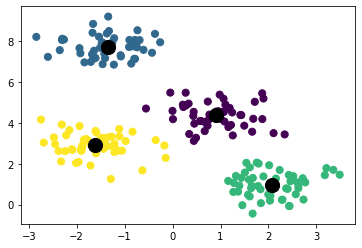

In [27]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1);

**k-means is limited to linear cluster boundaries**

In [28]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

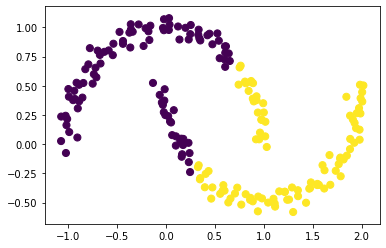

In [29]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

**solution is Spectral Clustering**

C:\programms\Anaconda\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


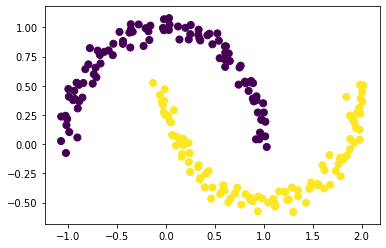

In [30]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

**but it works bad with clusters having linear boundaries**

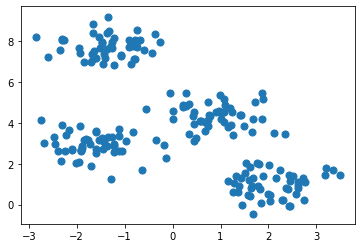

In [31]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

C:\programms\Anaconda\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


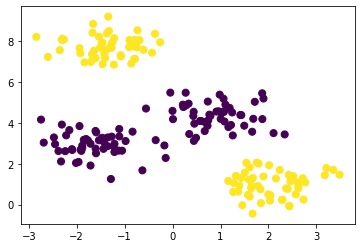

In [32]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');